In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Collection

In [3]:
# Load the MovieLens dataset into a dataframe
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [22]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Step 2: Data Exploration

In [5]:
# How many movies are there in the dataset?
num_movies = movies.shape[0]
print("Number of movies:", num_movies)

Number of movies: 9742


In [6]:
# How many users are there in the dataset?
num_users = ratings['userId'].nunique()
print("Number of users:", num_users)

Number of users: 610


In [7]:
# How many ratings are there in the dataset?
num_ratings = ratings.shape[0]
print("Number of ratings:", num_ratings)

Number of ratings: 100836


In [8]:
# What is the average rating for all movies?
avg_rating_all = ratings['rating'].mean()
print("Average rating for all movies:", avg_rating_all)

Average rating for all movies: 3.501556983616962


In [10]:
# What is the average rating for each movie?
avg_ratings = ratings.groupby('movieId')['rating'].mean()
avg_ratings

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

# Step 3: Data Cleaning

In [11]:
# Remove any duplicates
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

In [12]:
# Remove any missing data
movies.dropna(inplace=True)
ratings.dropna(inplace=True)

In [13]:
# Remove any outliers
ratings = ratings[(ratings['rating'] >= 0.5) & (ratings['rating'] <= 5.0)]

# Step 4: Data Analysis

In [14]:
# What is the most popular movie?
popularity = ratings.groupby('movieId')['rating'].count()
most_popular_movie = movies.loc[popularity.idxmax(), 'title']
print("Most popular movie:", most_popular_movie)

Most popular movie: Age of Innocence, The (1993)


In [15]:
# What is the highest-rated movie?
highest_rated_movie = movies.loc[avg_ratings.idxmax(), 'title']
print("Highest-rated movie:", highest_rated_movie)

Highest-rated movie: Indian in the Cupboard, The (1995)


In [16]:
# What is the lowest-rated movie?
lowest_rated_movie = movies.loc[avg_ratings.idxmin(), 'title']
print("Lowest-rated movie:", lowest_rated_movie)

Lowest-rated movie: Lord of the Flies (1990)


# Step 5: Data Visualization

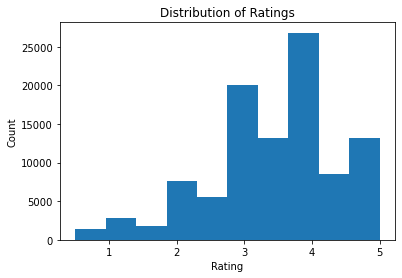

In [24]:
# A histogram of ratings distribution
plt.hist(ratings['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

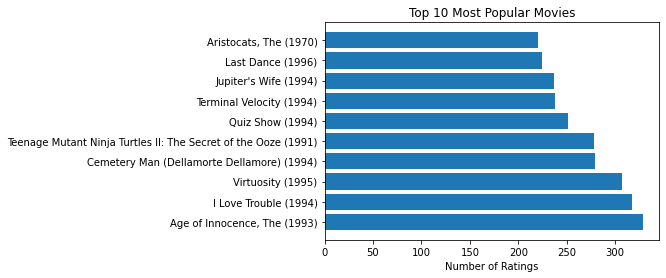

In [25]:
# A bar chart of the most popular movies
plt.barh(movies.loc[popularity.nlargest(10).index, 'title'], popularity.nlargest(10))
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most Popular Movies')
plt.show()

# Step 6: Conclusion

In [28]:
# Summarize the findings
print("The most popular movie is:", most_popular_movie)
print("The highest-rated movie is:", highest_rated_movie)

The most popular movie is: Age of Innocence, The (1993)
The highest-rated movie is: Indian in the Cupboard, The (1995)
